# &#x1F310; &nbsp; Code Library, Style, and Links
Version in `PYTHON`:

&#x1F4D8; &nbsp; [kaggle_passnyc.ipynb](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/kaggle_passnyc.ipynb)

Useful `LINKS`:

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)

&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [ggplot2](https://ggplot2.tidyverse.org/)

&#x1F4E1; &nbsp; [R Tutorial](https://www.tutorialspoint.com/r/index.htm)

In [2]:
library(IRdisplay)
library(repr)
library(tidyverse)
library(formattable)
library(zoo)
library(grid)
library(gridExtra)

library(tensorflow)
library(keras)
library(imager)
library(R6)
library(colormap)
library(purrr)
library(DataExplorer)
library(DT)

In [3]:
keras_backend <- backend()

In [5]:
display_html("<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 5px 5px 5px #aaa;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #818286; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: #37c9e1;}      
div.output_stderr pre {background-color: gainsboro;}  
div.output_stderr {background-color: slategrey;}
</style>")

In [4]:
b <- "#3636ff"
r <- "#ff3636"
lr <- "#ff6f6f"
lb <- "#6f6fff"

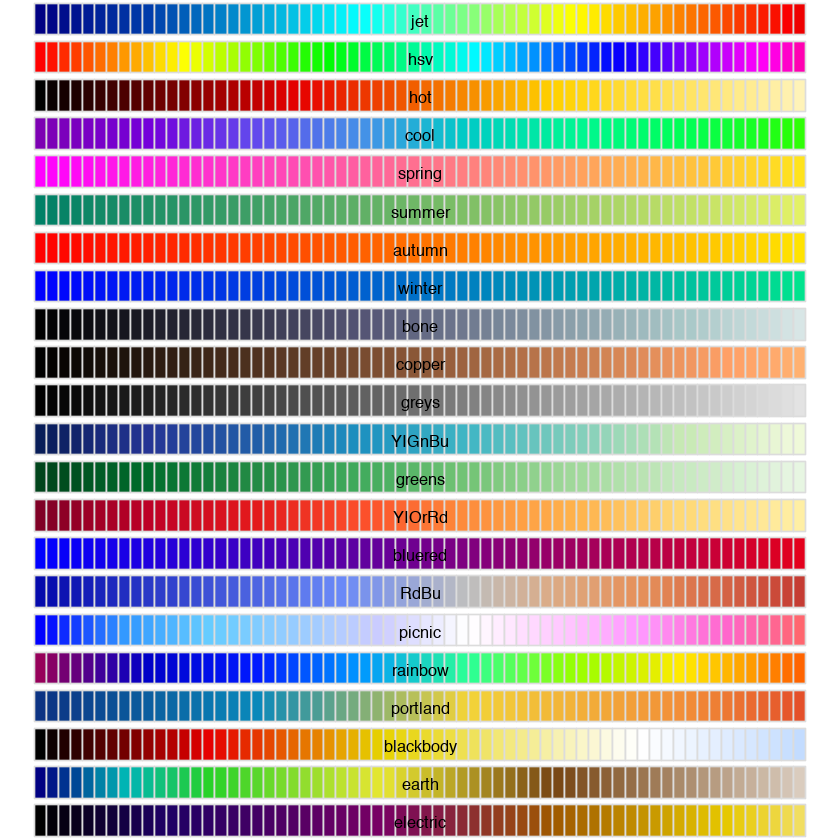

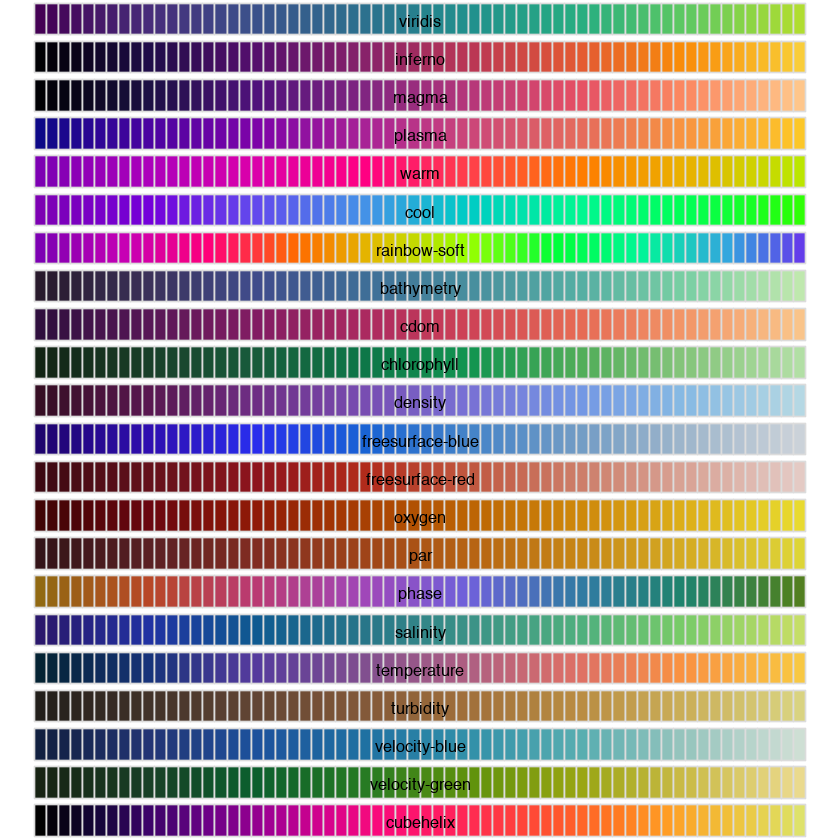

In [5]:
par(mfrow=c(22,1),mar=rep(0.2,4))
purrr::walk(colormaps, function(x) { 
  barplot(rep(1,64),yaxt="n",
          space=c(0,0),
          border="gainsboro",
          col=colormap(colormap=x), 
          main=sprintf("\n\n%s",x))
  })

# &#x1F310; &nbsp; Load the Data

In [6]:
school_explorer <- read.csv("2016 School Explorer.csv")
d5_shsat <- read.csv("D5 SHSAT Registrations and Testers.csv")
dim(school_explorer); dim(d5_shsat)

[1] 1272  161

[1] 140   7

In [7]:
school_explorer <- school_explorer[,4:161]
formattable(school_explorer[1:5,1:8])

School.Name,SED.Code,Location.Code,District,Latitude,Longitude,Address..Full.,City
P.S. 015 ROBERTO CLEMENTE,3.101e+11,01M015,1,40.72183,-73.97877,"333 E 4TH ST NEW YORK, NY 10009",NEW YORK
P.S. 019 ASHER LEVY,3.101e+11,01M019,1,40.72989,-73.98423,"185 1ST AVE NEW YORK, NY 10003",NEW YORK
P.S. 020 ANNA SILVER,3.101e+11,01M020,1,40.72127,-73.98632,"166 ESSEX ST NEW YORK, NY 10002",NEW YORK
P.S. 034 FRANKLIN D. ROOSEVELT,3.101e+11,01M034,1,40.72615,-73.97504,"730 E 12TH ST NEW YORK, NY 10009",NEW YORK
THE STAR ACADEMY - P.S.63,3.101e+11,01M063,1,40.72440,-73.98636,"121 E 3RD ST NEW YORK, NY 10009",NEW YORK


In [8]:
cat(colnames(school_explorer)[1:38],sep=", ")

School.Name, SED.Code, Location.Code, District, Latitude, Longitude, Address..Full., City, Zip, Grades, Grade.Low, Grade.High, Community.School., Economic.Need.Index, School.Income.Estimate, Percent.ELL, Percent.Asian, Percent.Black, Percent.Hispanic, Percent.Black...Hispanic, Percent.White, Student.Attendance.Rate, Percent.of.Students.Chronically.Absent, Rigorous.Instruction.., Rigorous.Instruction.Rating, Collaborative.Teachers.., Collaborative.Teachers.Rating, Supportive.Environment.., Supportive.Environment.Rating, Effective.School.Leadership.., Effective.School.Leadership.Rating, Strong.Family.Community.Ties.., Strong.Family.Community.Ties.Rating, Trust.., Trust.Rating, Student.Achievement.Rating, Average.ELA.Proficiency, Average.Math.Proficiency

In [9]:
summary(school_explorer[,1:15])

                                                                         School.Name  
 P.S. 212                                                                      :   2  
 P.S. 253                                                                      :   2  
 A.C.E. ACADEMY FOR SCHOLARS AT THE GERALDINE FERRARO CAMPUS                   :   1  
 ACADEMIC LEADERSHIP CHARTER SCHOOL                                            :   1  
 ACADEMY FOR COLLEGE PREPARATION AND CAREER EXPLORATION: A COLLEGE BOARD SCHOOL:   1  
 ACADEMY FOR NEW AMERICANS                                                     :   1  
 (Other)                                                                       :1264  
    SED.Code         Location.Code     District        Latitude    
 Min.   :3.075e+11   01M015 :   1   Min.   : 1.00   Min.   :40.51  
 1st Qu.:3.209e+11   01M019 :   1   1st Qu.: 9.00   1st Qu.:40.67  
 Median :3.315e+11   01M020 :   1   Median :15.00   Median :40.72  
 Mean   :3.287e+11   01M034 :   

In [10]:
t(formattable(d5_shsat[1:5,]))

,1,2,3,4,5
DBN,05M046,05M046,05M046,05M046,05M123
School.name,P.S. 046 Arthur Tappan,P.S. 046 Arthur Tappan,P.S. 046 Arthur Tappan,P.S. 046 Arthur Tappan,P.S. 123 Mahalia Jackson
Year.of.SHST,2013,2014,2015,2016,2013
Grade.level,8,8,8,8,8
Enrollment.on.10.31,91,95,73,56,62
Number.of.students.who.registered.for.the.SHSAT,31,26,21,20,31
Number.of.students.who.took.the.SHSAT,14,7,10,8,14


In [11]:
summary(d5_shsat)

      DBN                                                       School.name
 05M362 : 8   Columbia Secondary School                               : 8  
 05M499 : 8   Democracy Prep Charter School                           : 8  
 05M670 : 8   Democracy Prep Harlem Charter School                    : 8  
 84M341 : 8   Frederick Douglass Academy                              : 8  
 84M350 : 8   Harlem Children's Zone Promise Academy II Charter School: 8  
 84M481 : 8   Thurgood Marshall Academy for Learning and Social Change: 8  
 (Other):92   (Other)                                                 :92  
  Year.of.SHST   Grade.level    Enrollment.on.10.31
 Min.   :2013   Min.   :8.000   Min.   : 17.00     
 1st Qu.:2014   1st Qu.:8.000   1st Qu.: 62.75     
 Median :2015   Median :8.000   Median : 86.00     
 Mean   :2015   Mean   :8.393   Mean   : 91.97     
 3rd Qu.:2016   3rd Qu.:9.000   3rd Qu.:113.00     
 Max.   :2016   Max.   :9.000   Max.   :344.00     
                            

# &#x1F310; &nbsp; Missing Values

In [12]:
school_explorer[school_explorer == "N/A"] <- NA
na_counts <- data.frame(colSums(is.na(school_explorer))[colSums(is.na(school_explorer))!=0])
colnames(na_counts) <- c("NA Counting")
formattable(na_counts)

,NA Counting
Economic.Need.Index,25
School.Income.Estimate,396
Student.Attendance.Rate,25
Percent.of.Students.Chronically.Absent,25
Rigorous.Instruction..,25
Rigorous.Instruction.Rating,76
Collaborative.Teachers..,25
Collaborative.Teachers.Rating,76
Supportive.Environment..,25
Supportive.Environment.Rating,80


In [13]:
sum(is.na(d5_shsat))

[1] 0

# &#x1F310; &nbsp; School Names

In [14]:
formattable(head(data.frame(summary(school_explorer$School.Name))))

,summary.school_explorer.School.Name.
P.S. 212,2
P.S. 253,2
A.C.E. ACADEMY FOR SCHOLARS AT THE GERALDINE FERRARO CAMPUS,1
ACADEMIC LEADERSHIP CHARTER SCHOOL,1
ACADEMY FOR COLLEGE PREPARATION AND CAREER EXPLORATION: A COLLEGE BOARD SCHOOL,1
ACADEMY FOR NEW AMERICANS,1


In [15]:
names <- school_explorer$School.Name=='P.S. 212' | school_explorer$School.Name=='P.S. 253'
t(formattable(school_explorer[which(names),1:10]))

,428,713,909,1024
School.Name,P.S. 212,P.S. 253,P.S. 253,P.S. 212
SED.Code,3.212e+11,3.321e+11,3.427e+11,3.430e+11
Location.Code,12X212,21K253,27Q253,30Q212
District,12,21,27,30
Latitude,40.82872,40.58008,40.60730,40.75319
Longitude,-73.90045,-73.96195,-73.74881,-73.88490
Address..Full.,"1180 TINTON AVE BRONX, NY 10456","601 OCEANVIEW AVE BROOKLYN, NY 11235","1307 CENTRAL AVE FAR ROCKAWAY, NY 11691","34-25 82ND ST JACKSON HEIGHTS, NY 11372"
City,BRONX,BROOKLYN,FAR ROCKAWAY,JACKSON HEIGHTS
Zip,10456,11235,11691,11372
Grades,"PK,0K,01,02,03,04,05,06,07,08","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","0K,01,02,03,04,05"


In [16]:
school_explorer$School.Name <- as.character(school_explorer$School.Name)

school_explorer$School.Name[428] <- 'P.S. 212 D12'
school_explorer$School.Name[1024] <- 'P.S. 212 D30'
school_explorer$School.Name[713] <- 'P.S. 253 D21'
school_explorer$School.Name[909] <- 'P.S. 253 D27'

t(formattable(school_explorer[c(428,713,909,1024),1:10]))

,428,713,909,1024
School.Name,P.S. 212 D12,P.S. 253 D21,P.S. 253 D27,P.S. 212 D30
SED.Code,3.212e+11,3.321e+11,3.427e+11,3.430e+11
Location.Code,12X212,21K253,27Q253,30Q212
District,12,21,27,30
Latitude,40.82872,40.58008,40.60730,40.75319
Longitude,-73.90045,-73.96195,-73.74881,-73.88490
Address..Full.,"1180 TINTON AVE BRONX, NY 10456","601 OCEANVIEW AVE BROOKLYN, NY 11235","1307 CENTRAL AVE FAR ROCKAWAY, NY 11691","34-25 82ND ST JACKSON HEIGHTS, NY 11372"
City,BRONX,BROOKLYN,FAR ROCKAWAY,JACKSON HEIGHTS
Zip,10456,11235,11691,11372
Grades,"PK,0K,01,02,03,04,05,06,07,08","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","0K,01,02,03,04,05"


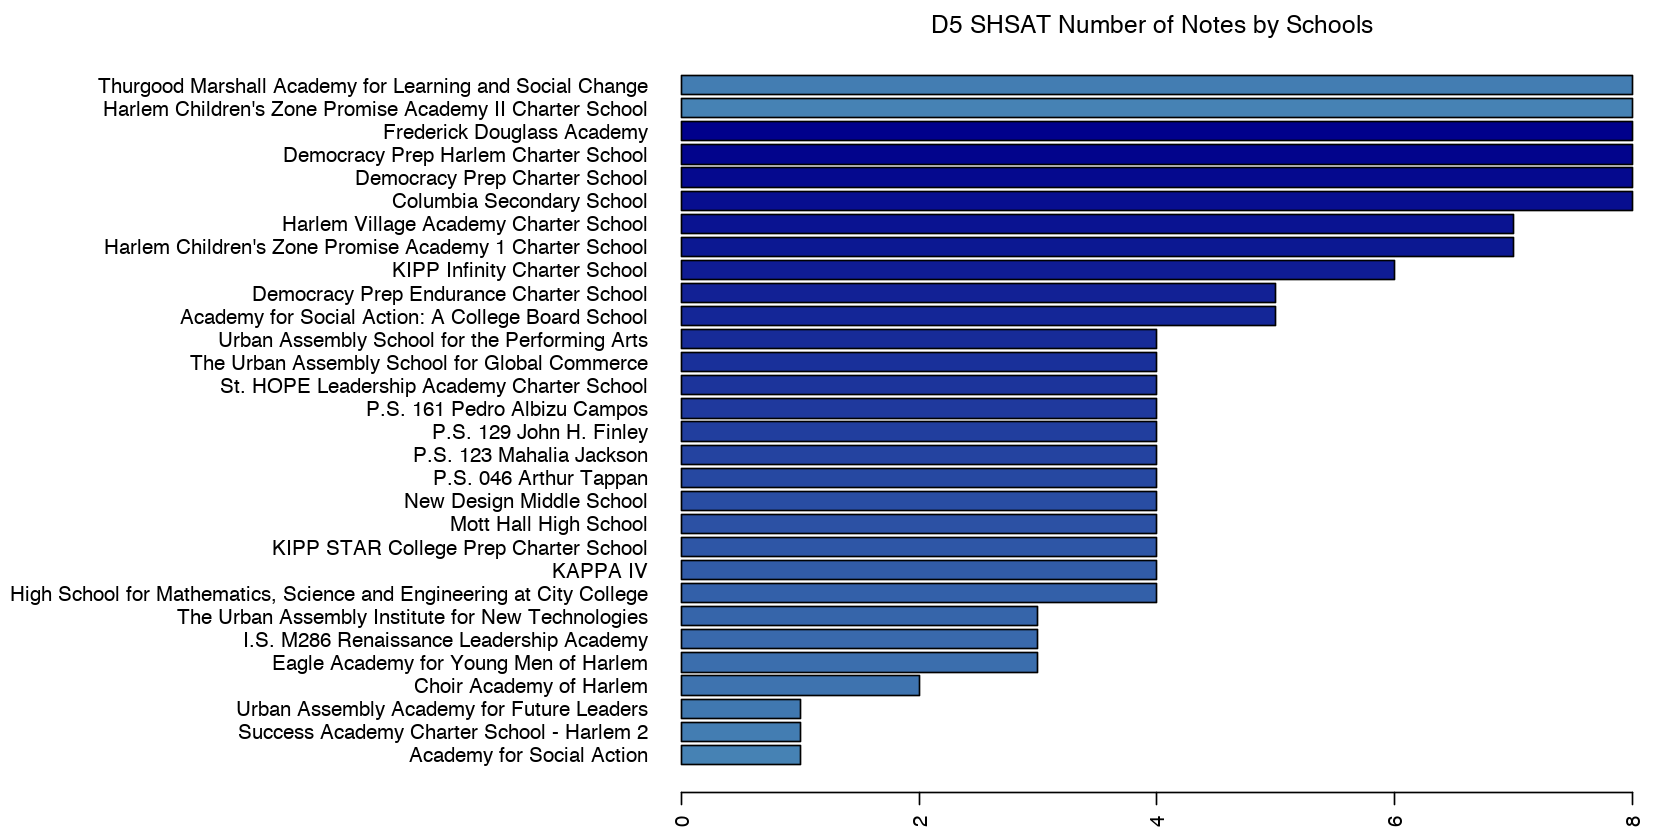

In [17]:
options(repr.plot.width=14,repr.plot.height=7)
par(mar=c(2,28,2,2))

counts <- sort(table(d5_shsat$School.name))
pal <- colorRampPalette(colors=c("steelblue","darkblue"))(28)

barplot(counts,horiz=TRUE,col=pal,
        ylab="",las=2,
        main="D5 SHSAT Number of Notes by Schools")

# &#x1F310; &nbsp; Preprocess Variables

In [18]:
school_explorer$School.Income.Estimate <- as.character(school_explorer$School.Income.Estimate)
school_explorer$School.Income.Estimate <- sub("\\$","",school_explorer$School.Income.Estimate)
school_explorer$School.Income.Estimate <- sub(",","",school_explorer$School.Income.Estimate)
school_explorer$School.Income.Estimate <- as.numeric(school_explorer$School.Income.Estimate)
school_explorer$School.Income.Estimate <- na.approx(school_explorer$School.Income.Estimate)

In [19]:
nastr2num <- function(x){ x <- as.numeric(sub("%","",x))}

percent_list <- c('Percent.ELL',
                  'Percent.Asian','Percent.Black','Percent.Hispanic',
                  'Percent.Black...Hispanic','Percent.White',
                  'Student.Attendance.Rate',
                  'Percent.of.Students.Chronically.Absent',
                  'Rigorous.Instruction..','Collaborative.Teachers..',
                  'Supportive.Environment..','Effective.School.Leadership..',
                  'Strong.Family.Community.Ties..','Trust..')
target_list <- c("Average.ELA.Proficiency","Average.Math.Proficiency")
economic_list <- c("Economic.Need.Index","School.Income.Estimate")
rating_list <- c('Rigorous.Instruction.Rating','Collaborative.Teachers.Rating',
                 'Supportive.Environment.Rating','Effective.School.Leadership.Rating',
                 'Strong.Family.Community.Ties.Rating','Trust.Rating',
                 'Student.Achievement.Rating')

In [20]:
for (el in c(percent_list,target_list,"Economic.Need.Index")) {
    school_explorer[el] <- sapply(school_explorer[el],nastr2num)
    school_explorer[el] <- na.approx(school_explorer[el])
}

for (el in rating_list) {
    vtable <- data.frame(table(school_explorer[el]))
    mvalue <- as.character(vtable$Var1[vtable$Freq == max(vtable$Freq)])
    school_explorer[el][is.na(school_explorer[el])] <- mvalue
}

In [21]:
sum(is.na(school_explorer))

[1] 0

In [22]:
#cn <- colnames(school_explorer)
#cn <- gsub("\\.","",cn) 
#colnames(school_explorer) <- cn

In [144]:
# data.frame(aggregate(. ~ District, school_explorer[c('District',target_list)], mean))

# &#x1F310; &nbsp; Indicators' Visualisation
Let's try to find the best way of representing each variable.

### Distribution Plots

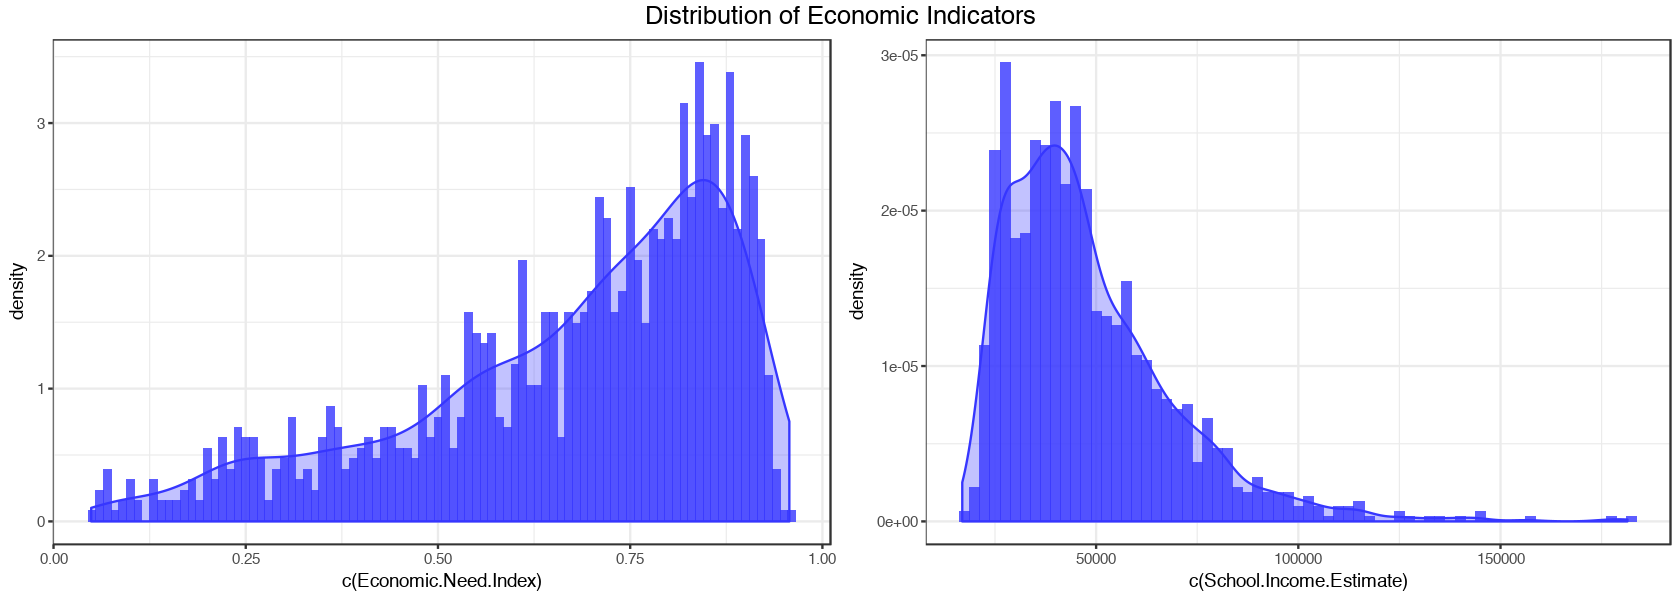

In [23]:
options(repr.plot.width=14,repr.plot.height=5)

p1 <- ggplot(school_explorer,aes(x=c(Economic.Need.Index))) + 
      geom_histogram(aes(y=..density..),binwidth=.01,alpha=0.8,fill=b) +
      geom_density(alpha=.3,fill=b,color=b) +
      theme_bw()

p2 <- ggplot(school_explorer, aes(x=c(School.Income.Estimate))) + 
      geom_histogram(aes(y=..density..),binwidth=2500,alpha=0.8,fill=b) +
      geom_density(alpha=.3,fill=b,color=b) +
      theme_bw()
   

top <- textGrob("Distribution of Economic Indicators",gp=gpar(fontsize=15))
grid.arrange(p1,p2,ncol=2,top=top)

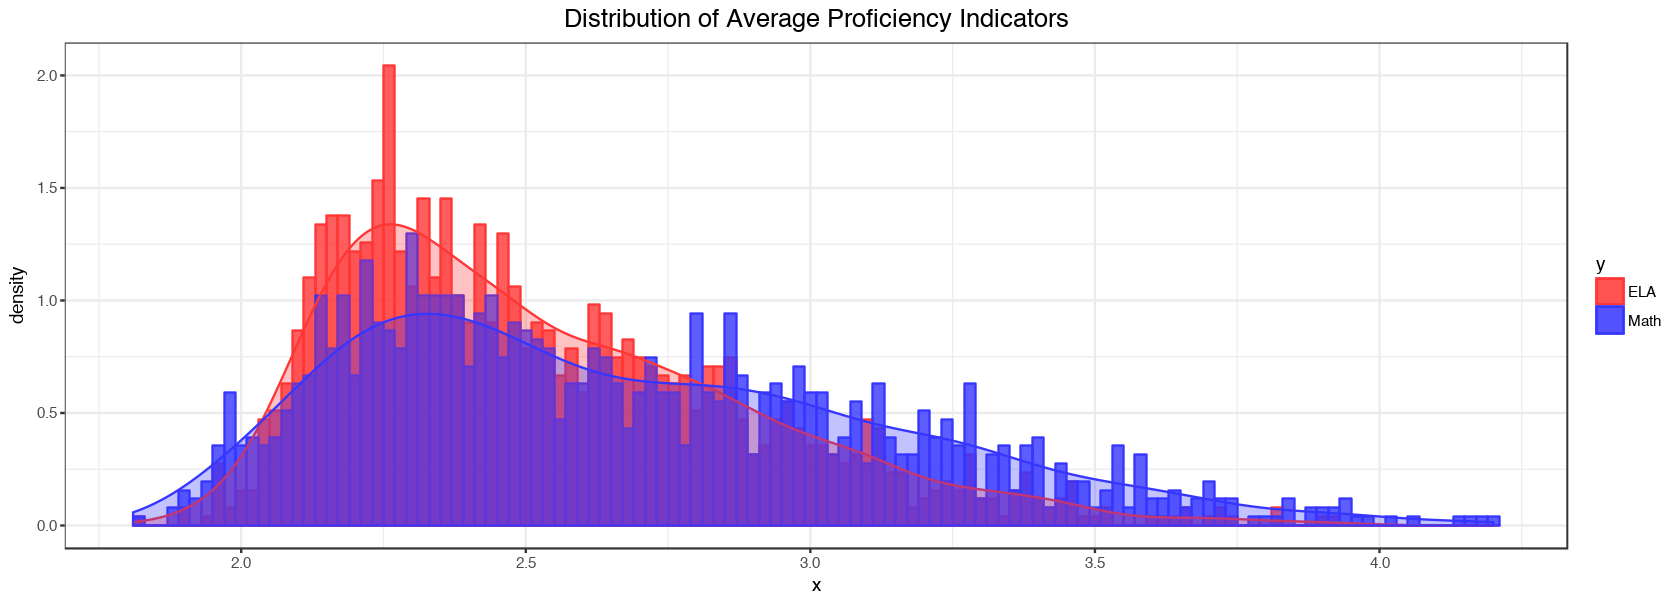

In [24]:
data <- data.frame(x=c(school_explorer$Average.ELA.Proficiency,
                       school_explorer$Average.Math.Proficiency),
                   y=rep(c('ELA','Math'),each=1272))

ggplot(data, aes(x=x,fill=y,color=y)) + 
    geom_histogram(aes(y=..density..),
                   alpha=.8, binwidth=0.02,
                   position="identity") +
    geom_density(alpha=.3) + 
    theme_bw() +
    scale_fill_manual(values=c(r,b)) + 
    scale_color_manual(values=c(r,b)) +
    ggtitle("Distribution of Average Proficiency Indicators") +
    theme(plot.title=element_text(size=15,hjust=0.5))

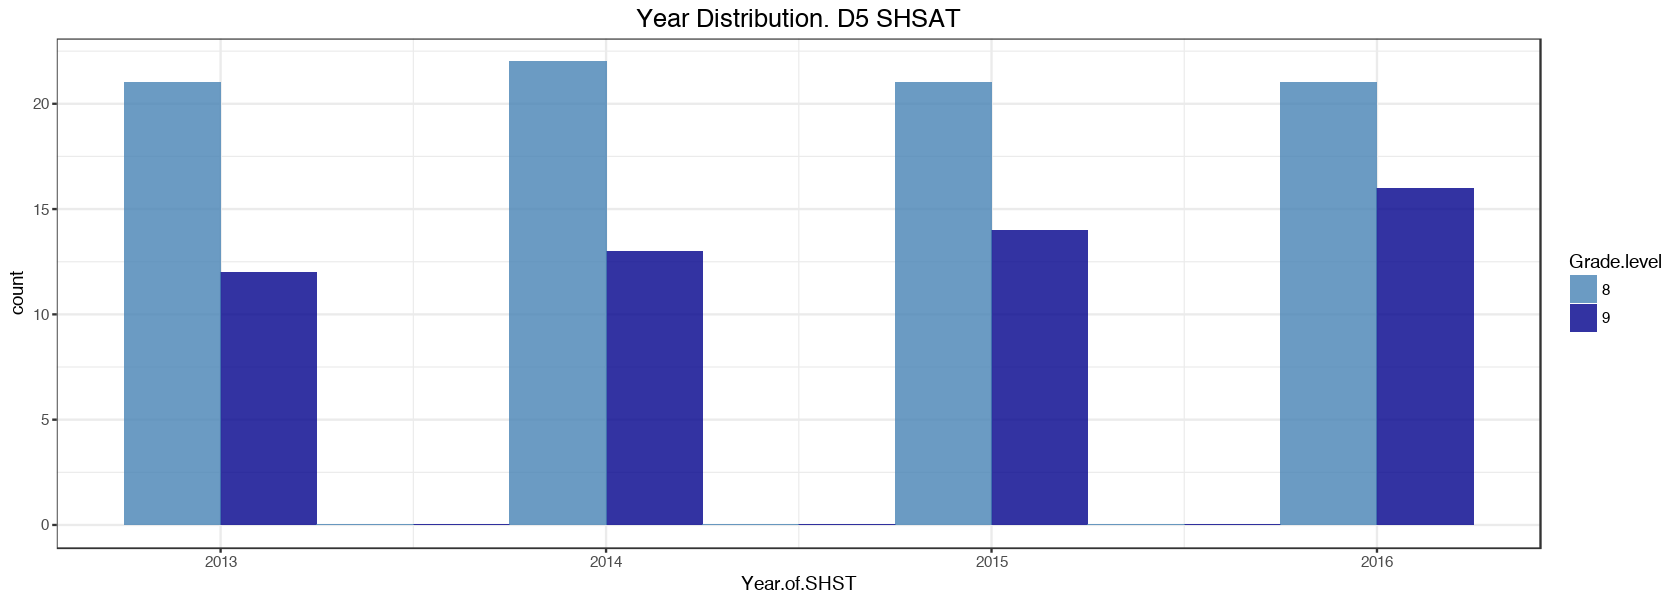

In [25]:
d5_shsat$Grade.level <- as.character(d5_shsat$Grade.level)
ggplot(d5_shsat,aes(x=Year.of.SHST,fill=Grade.level)) +
    geom_histogram(binwidth=.5,alpha=.8,
                   position="dodge") +
    theme_bw() +
    scale_fill_manual(values=c("steelblue","darkblue")) +
    ggtitle("Year Distribution. D5 SHSAT") +
    theme(plot.title=element_text(size=15,hjust=0.5))

### Area Plots

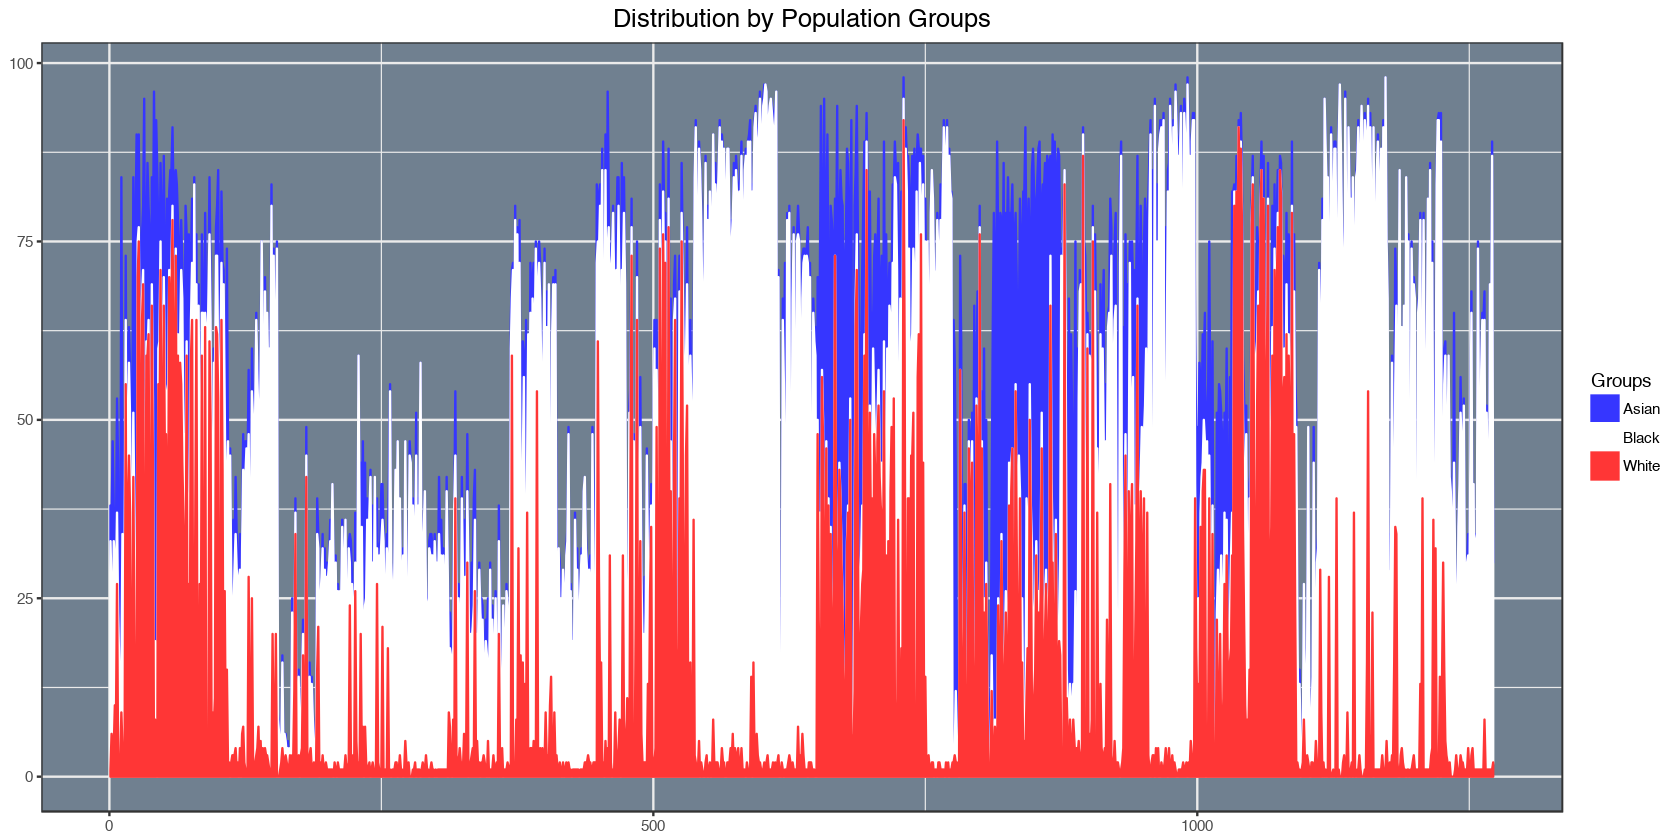

In [26]:
options(repr.plot.width=14,repr.plot.height=7)
data <- data.frame(x=rep(c(1:1272),3),
                   y=c(school_explorer$Percent.Asian,
                       school_explorer$Percent.White,
                       school_explorer$Percent.Black),
                   Groups=rep(c('Asian','White','Black'),each=1272))

ggplot(data,aes(x=x,y=y,fill=Groups,color=Groups),xlab="") +
    geom_area() +
    theme_bw() +
    scale_fill_manual(values=c(b,'white',r)) +
    scale_color_manual(values=c(b,'white',r)) +
    ggtitle("Distribution by Population Groups") +
    theme(plot.title=element_text(size=15,hjust=0.5),
          axis.title=element_blank(),
          panel.background=element_rect(fill='slategray'))

### Scatter Plots

In [76]:
options(repr.plot.width=14,repr.plot.height=12)
plot_variable1 <- function(v,x,lc,hc) {
    ggplot(school_explorer,aes(x=Longitude,y=Latitude,
                               color=c(school_explorer[v][1:1272,]))) +
    geom_point(size=0.8) +
    theme_bw() + ggtitle(gsub("\\."," ",v)) +
    scale_colour_gradient2(low=lc,high=hc,mid='white',
                           midpoint=x) +
    guides(color=guide_colourbar(title='')) +
    theme(plot.title=element_text(size=15,hjust=0.5),
          panel.background=element_rect(fill='slategray'))
}

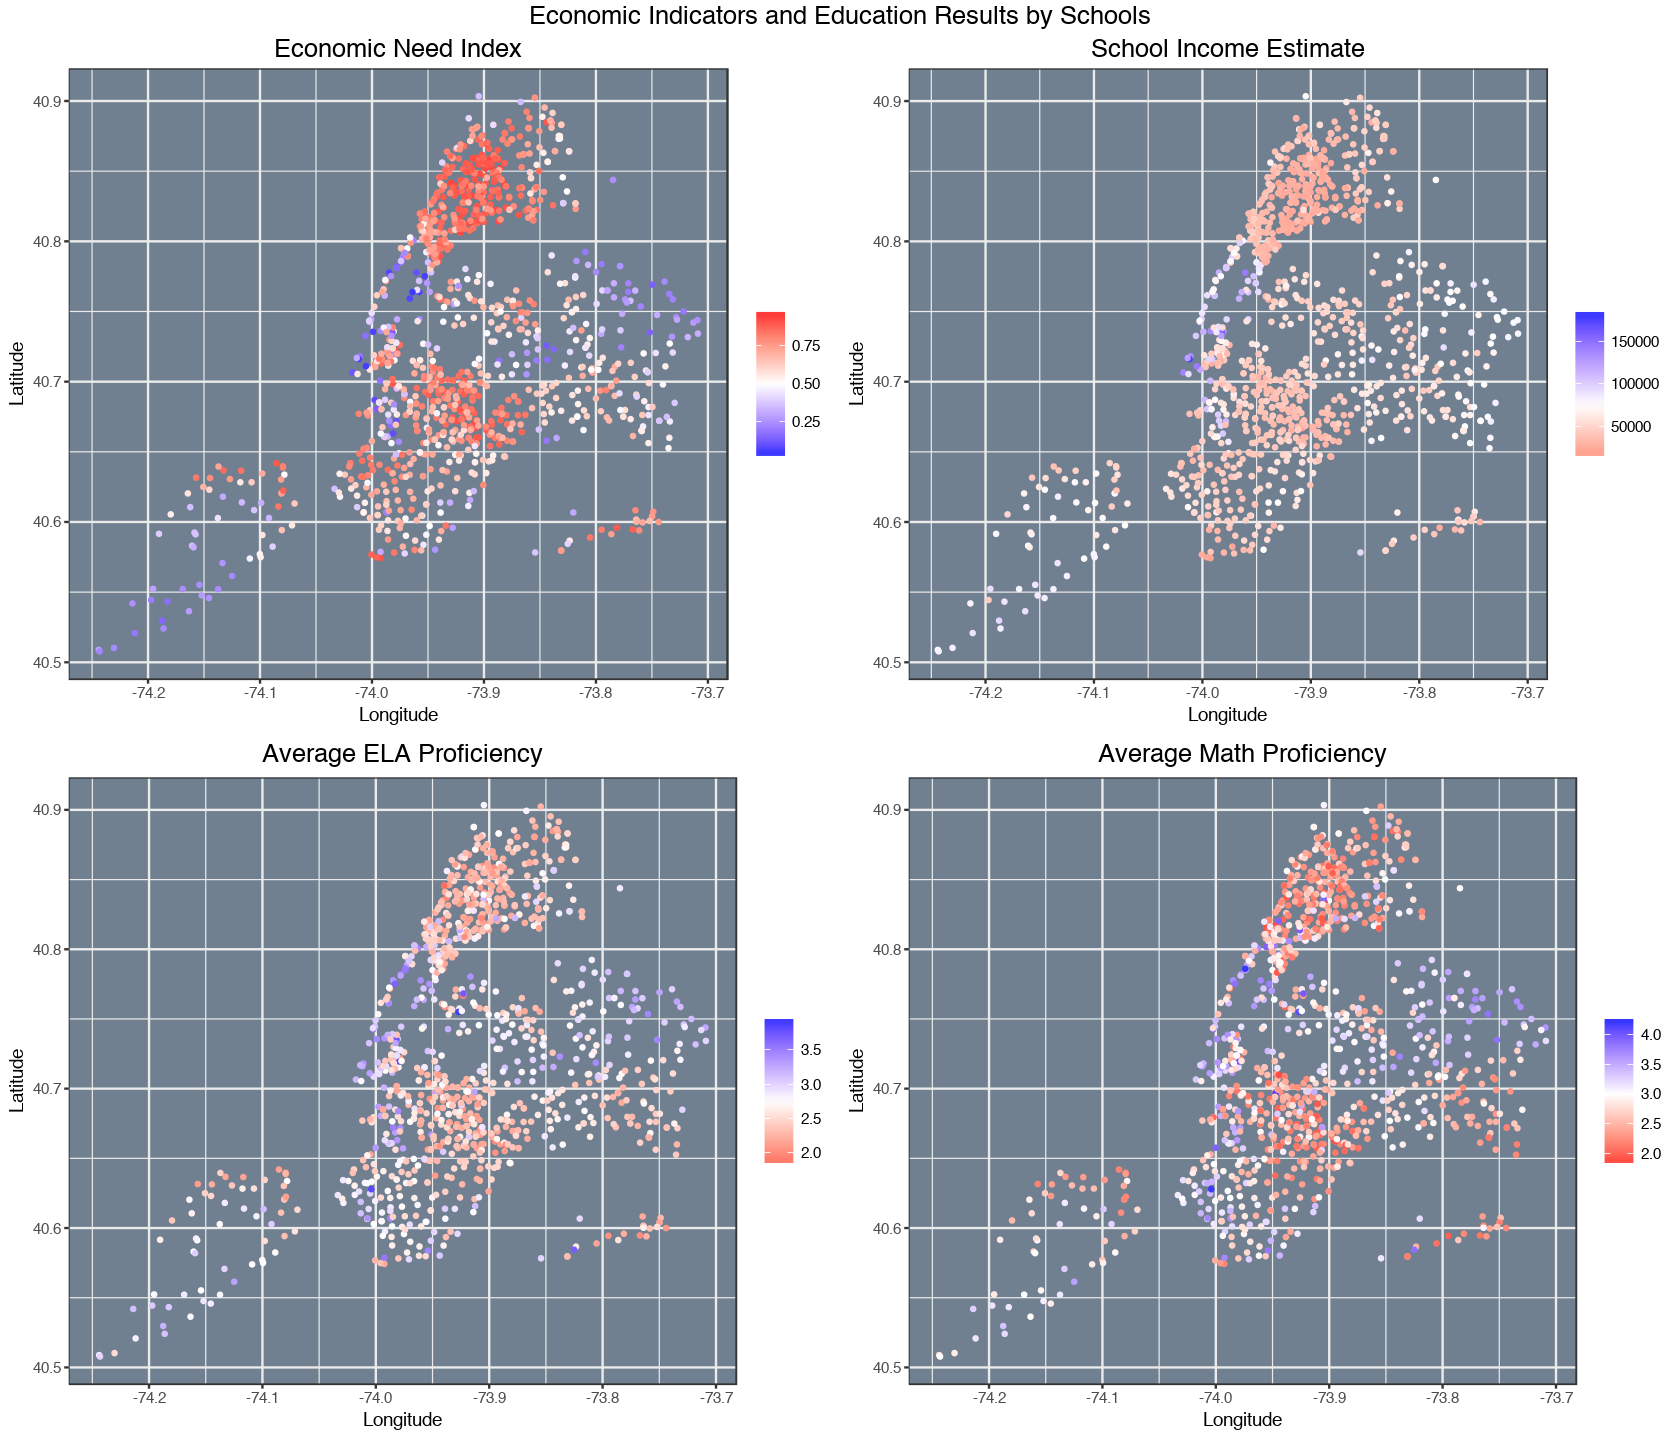

In [77]:
p1 <- plot_variable1('Economic.Need.Index',0.5,'#3636ff','#ff3636')
p2 <- plot_variable1('School.Income.Estimate',75000,'#ff3636','#3636ff')
p3 <- plot_variable1('Average.ELA.Proficiency',2.75,'#ff3636','#3636ff')
p4 <- plot_variable1('Average.Math.Proficiency',3.0,'#ff3636','#3636ff')

top <- textGrob("Economic Indicators and Education Results by Schools",gp=gpar(fontsize=15))
grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2,top=top)

Fortunately, economic problems are not correlated with educational results so strongly.

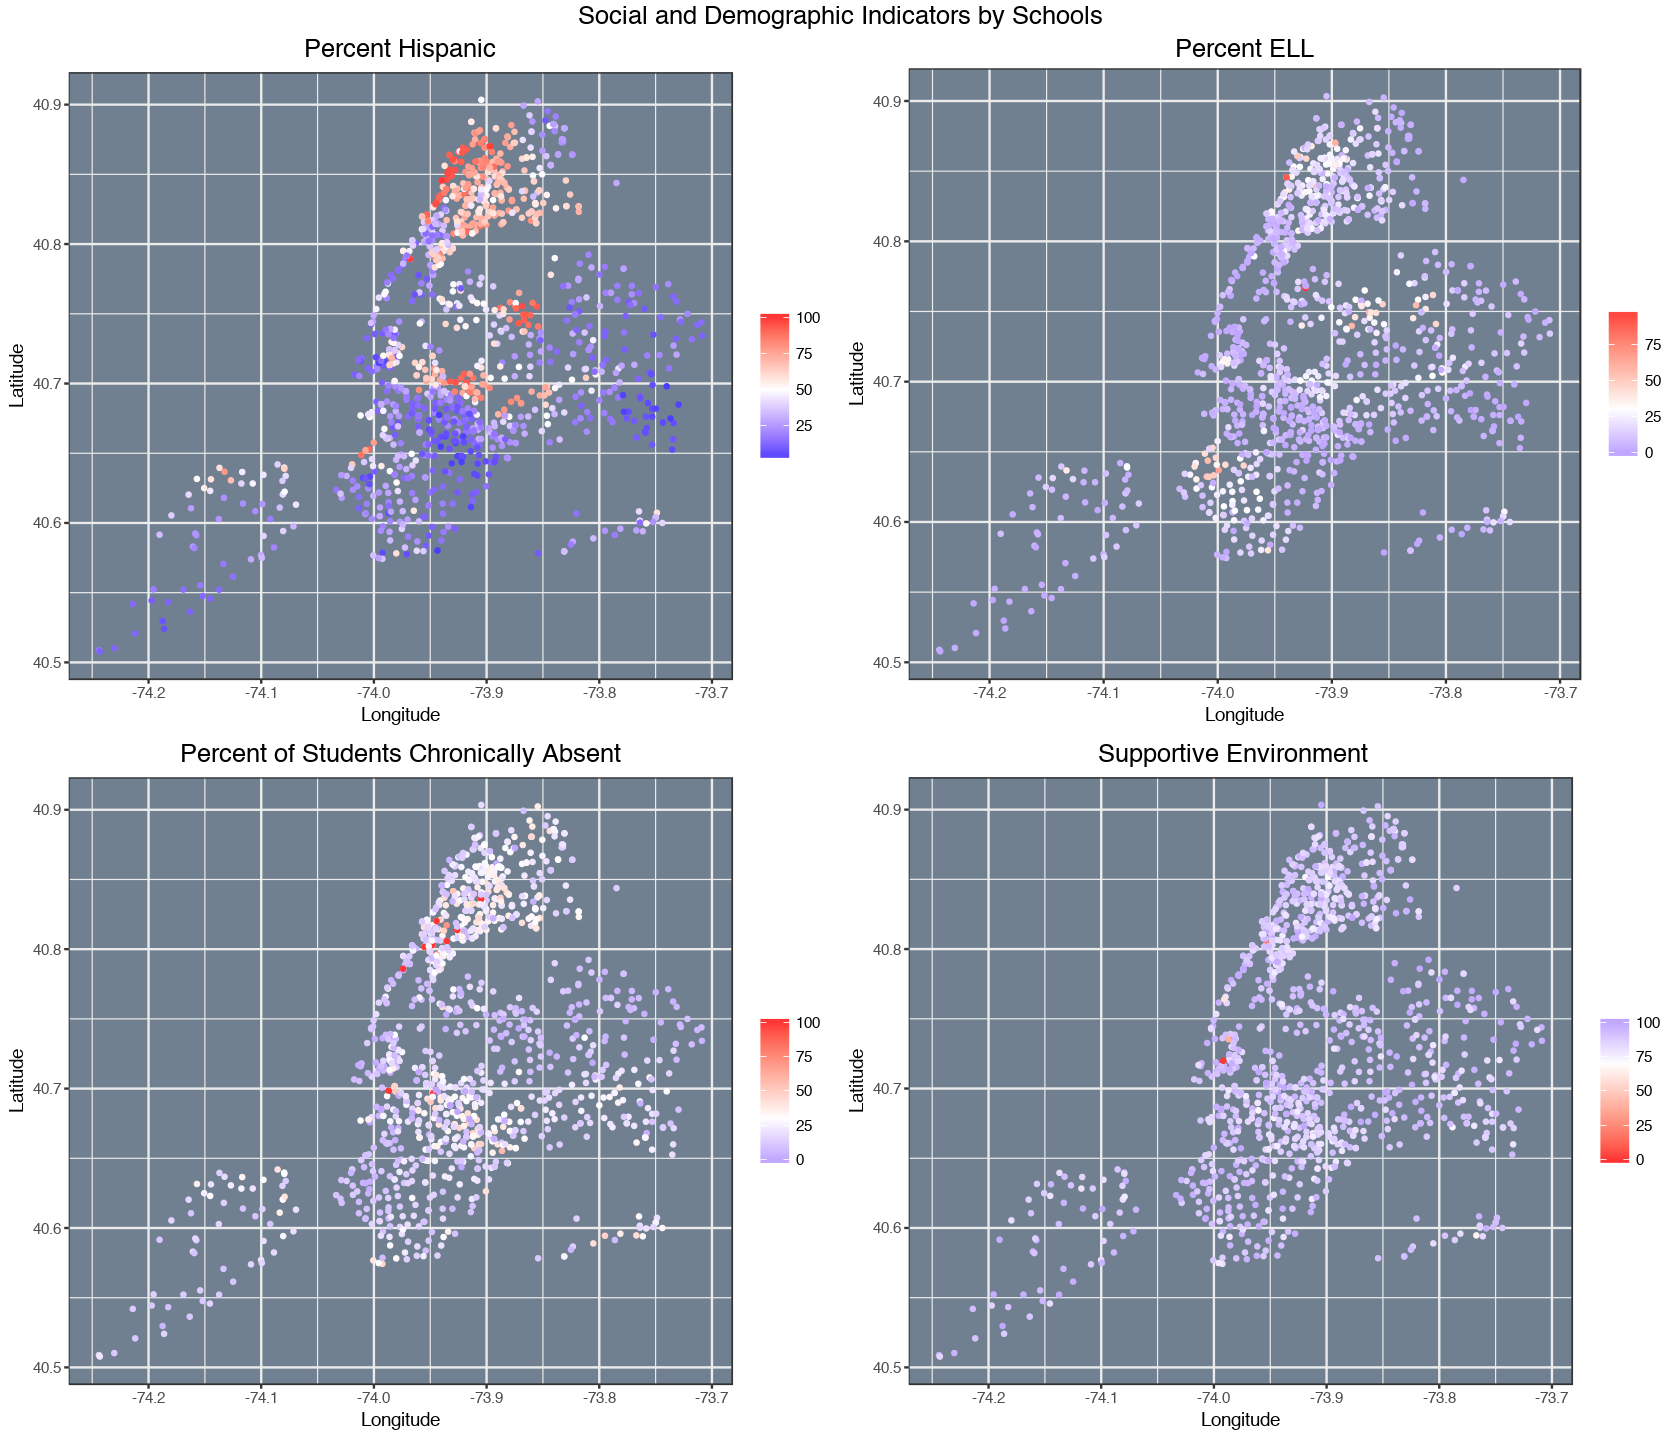

In [78]:
p1 <- plot_variable1('Percent.Hispanic',50,'#3636ff','#ff3636')
p2 <- plot_variable1('Percent.ELL',30,'#3636ff','#ff3636')
p3 <- plot_variable1('Percent.of.Students.Chronically.Absent',30,'#3636ff','#ff3636')
p4 <- plot_variable1('Supportive.Environment..',70,'#ff3636','#3636ff')

top <- textGrob("Social and Demographic Indicators by Schools",gp=gpar(fontsize=15))
grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2,top=top)

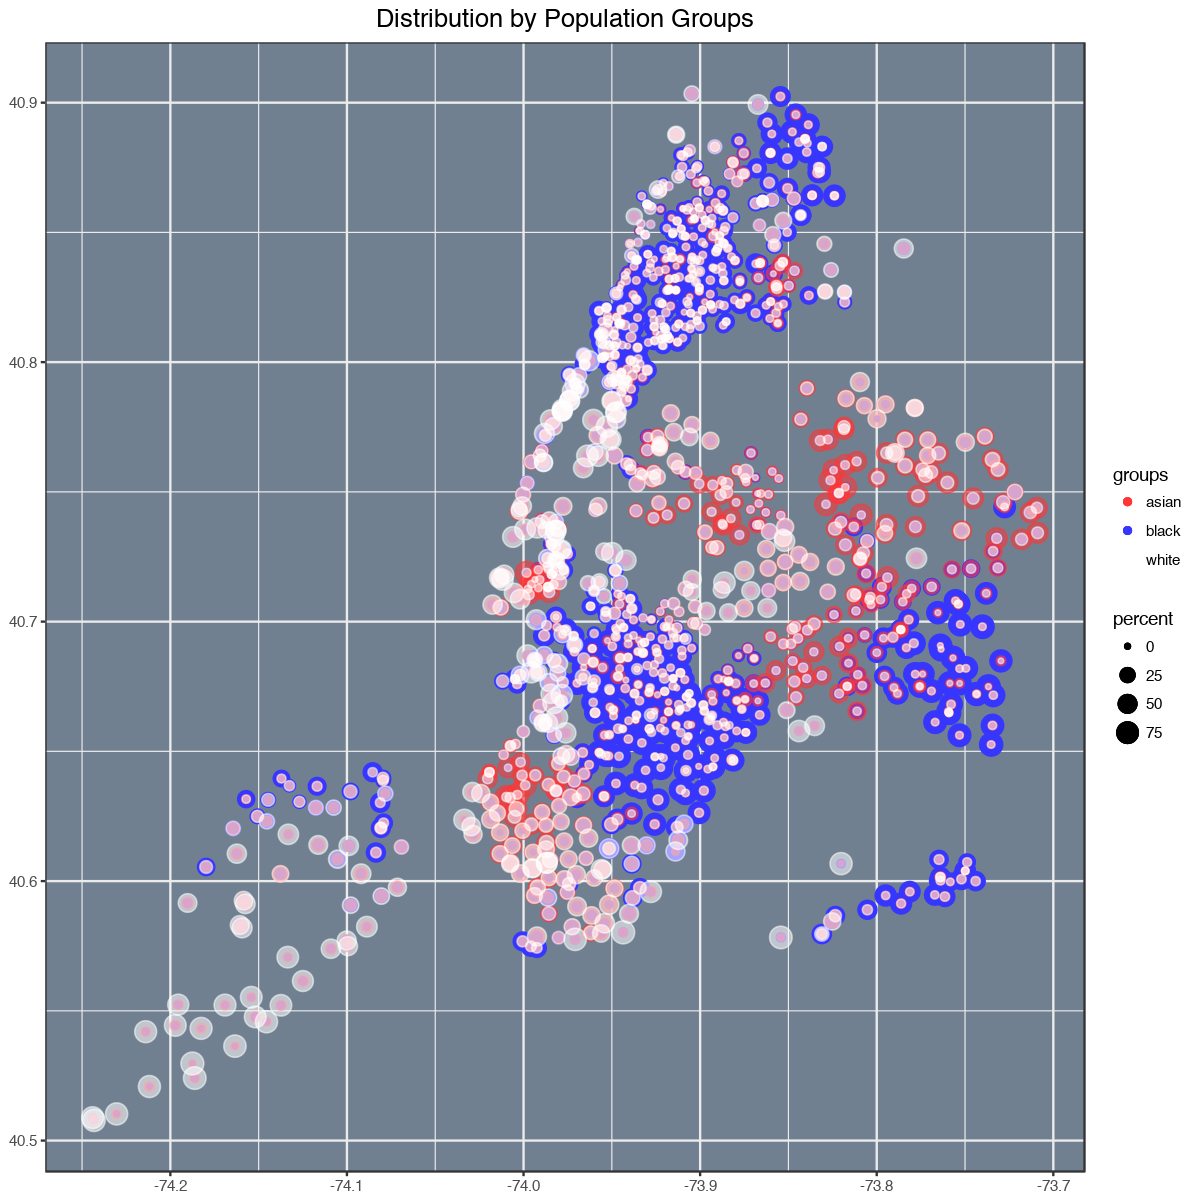

In [44]:
options(repr.plot.width=10,repr.plot.height=10)
data <- data.frame(x=c(school_explorer$Longitude),
                   y=c(school_explorer$Latitude),
                   asian=c(school_explorer$Percent.Asian),
                   white=c(school_explorer$Percent.White),
                   black=c(school_explorer$Percent.Black))
ggplot(data,aes(x=x,y=y,color=variable)) + 
    geom_point(aes(size=black,col="black")) + 
    geom_point(aes(size=asian,col="asian",alpha=0.4)) +
    geom_point(aes(size=white,col="white",alpha=0.4)) +
    scale_colour_manual(name='groups',
                        values=c(asian=r,white="white",black=b)) +
    theme_bw() + 
    guides(size=guide_legend(title="percent"),alpha="none") + 
    ggtitle("Distribution by Population Groups") +
    theme(plot.title=element_text(size=15,hjust=0.5),
          axis.title=element_blank(),
          panel.background=element_rect(fill='slategray'))

As it was expected there are some correlation tendencies between economic problems and social environment, discipline, ethnic characteristics.

### Pie Plots

Frequency Diagrams of Rating Indicators

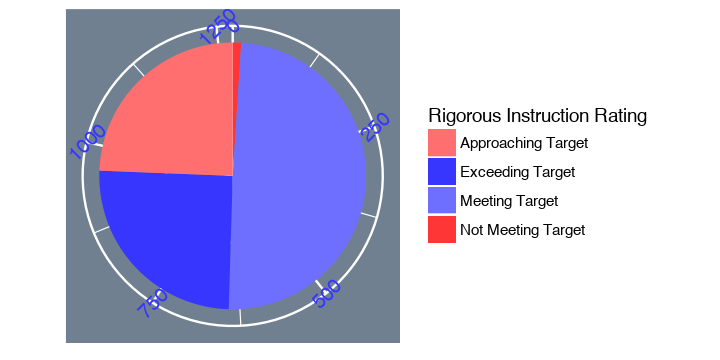

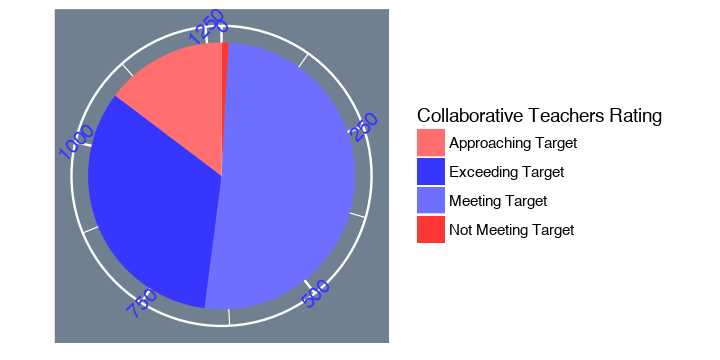

In [45]:
options(repr.plot.width=6,repr.plot.height=3)
display_html('<p style="color:#3636ff; font-family:Roboto; font-size:200%; text-shadow:5px 5px 5px #aaa;">
Frequency Diagrams of Rating Indicators</p>')
for (i in 1:2) {
    vtable <- data.frame(table(school_explorer[rating_list[i]]))[c(1,2,3,5),1:2]
    print(ggplot(vtable, aes(x=factor(1),y=Freq,fill=factor(Var1))) + 
              geom_bar(width=1,stat="identity") + 
              coord_polar(theta="y") +
              scale_fill_manual(name=gsub("\\."," ",rating_list[i]),
                                values=c(lr,b,lb,r)) +
              theme(axis.title=element_blank(),
                    axis.line=element_blank(),
                    axis.ticks.y=element_blank(),
                    axis.text.y=element_blank(),
                    axis.text.x=element_text(colour=b,size=12,angle=45),
                    panel.background=element_rect(fill='slategray')))
}

### Bar PLots

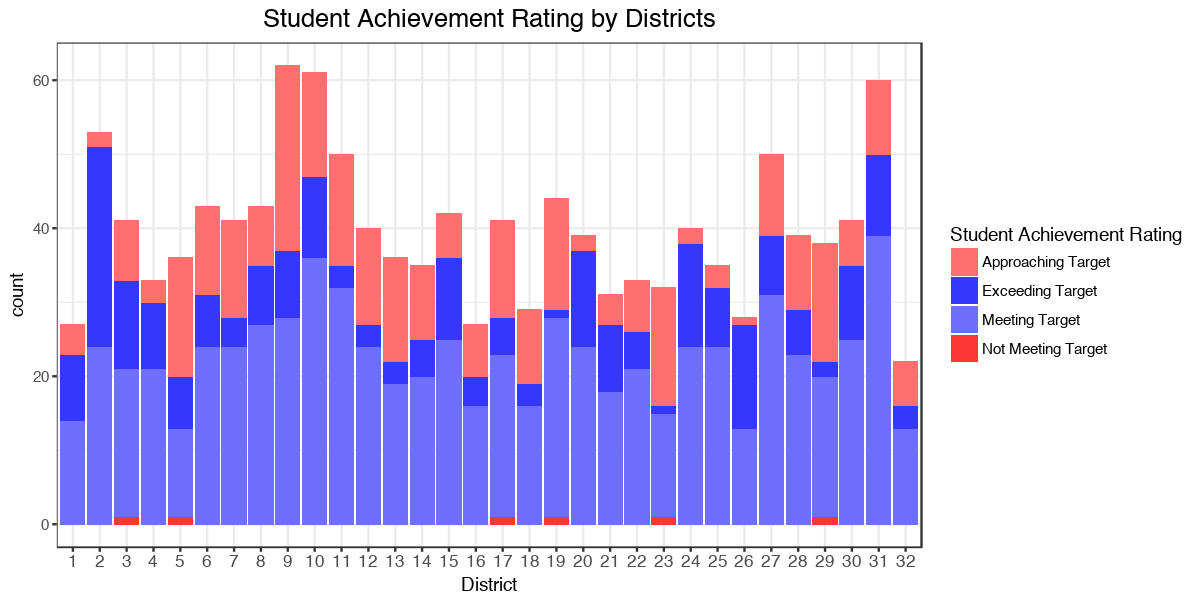

In [105]:
options(repr.plot.width=10,repr.plot.height=5)
ggplot(school_explorer,
       aes(x=factor(District),fill=Student.Achievement.Rating)) +
    geom_bar() + theme_bw() +
    xlab("District") + ggtitle('Student Achievement Rating by Districts') +
    scale_fill_manual(name="Student Achievement Rating",
                      values=c(lr,b,lb,r))  +
    theme(plot.title=element_text(size=15,hjust=0.5),
          axis.text.x=element_text(size=10,angle=0))

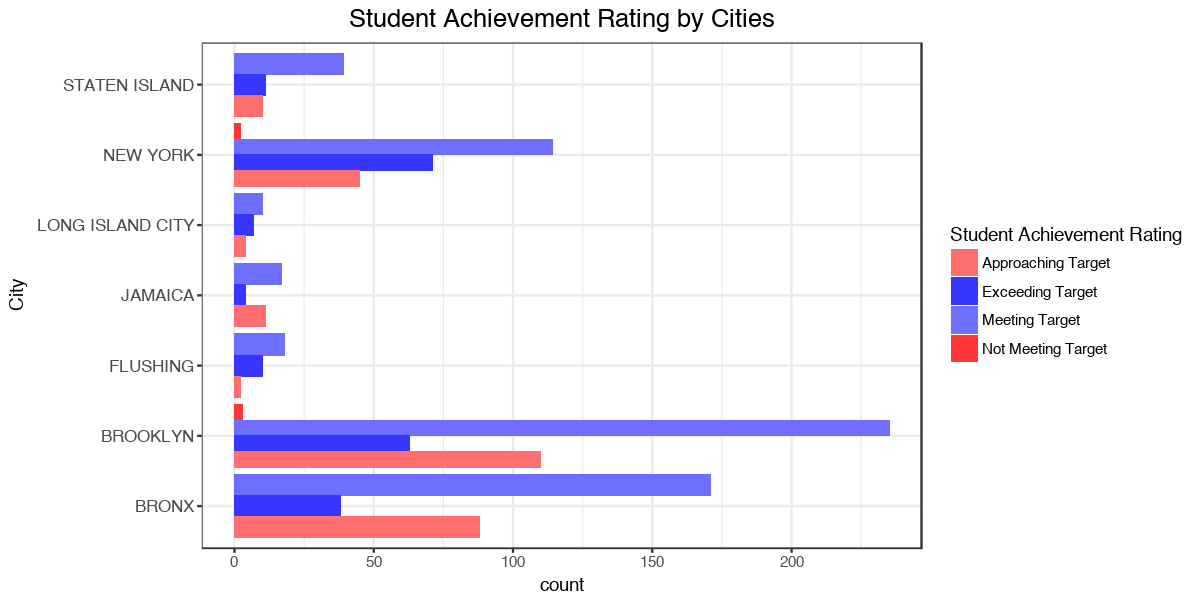

In [103]:
city_list = c('NEW YORK','BRONX','BROOKLYN',
             'STATEN ISLAND','JAMAICA',
             'FLUSHING','LONG ISLAND CITY')

ggplot(subset(school_explorer, school_explorer$City %in% city_list),
       aes(x=factor(City),fill=Student.Achievement.Rating)) +
    geom_bar(position='dodge') + theme_bw() + 
    coord_flip() + #facet_wrap(~Student.Achievement.Rating) +
    xlab("City") + ggtitle('Student Achievement Rating by Cities') +
    scale_fill_manual(name="Student Achievement Rating",
                      values=c(lr,b,lb,r)) +
    theme(plot.title=element_text(size=15,hjust=0.5),
          axis.text.y=element_text(size=10))

Low and High Grades by Districts

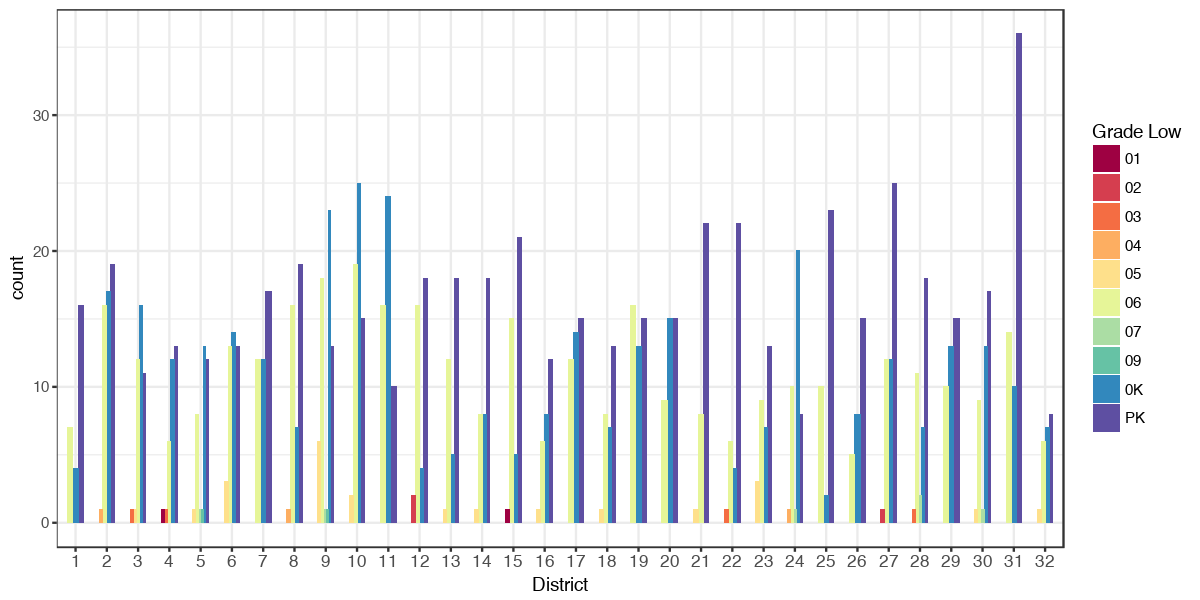

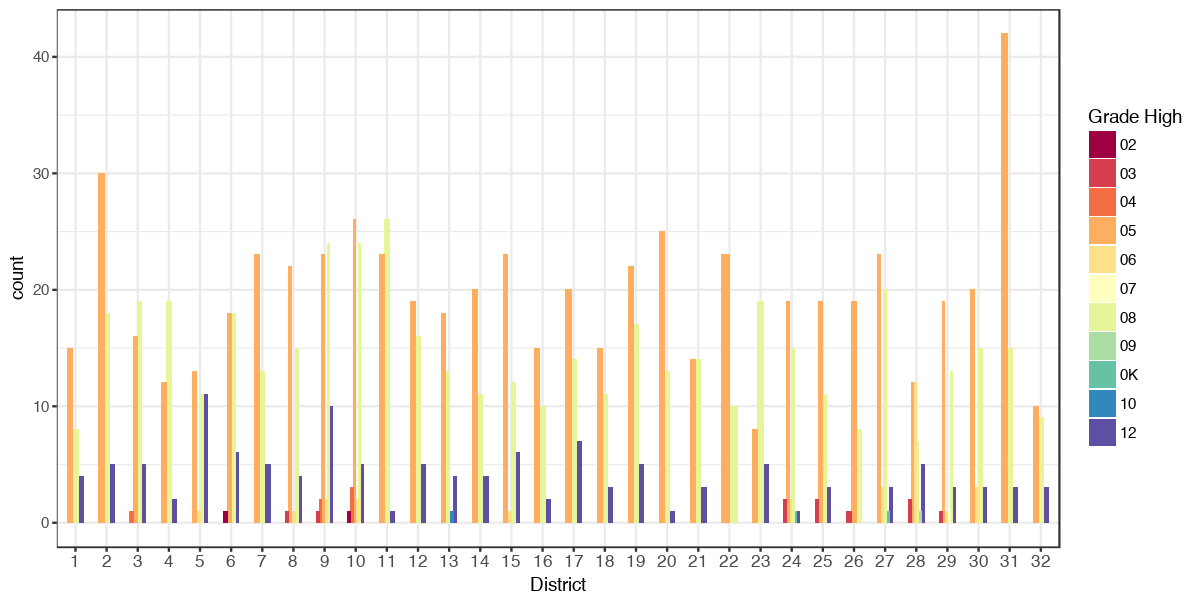

In [121]:
display_html('<p style="color:#3636ff; font-family:Roboto; font-size:200%; text-shadow:5px 5px 5px #aaa;">
Low and High Grades by Districts</p>')
plot_variable2 <- function(v) {
    ggplot(school_explorer,
           aes(x=factor(District),
               fill=school_explorer[v])) +
    geom_bar(position='dodge',width=0.5) + theme_bw() +
    xlab("District") + 
    scale_fill_brewer(name=gsub("\\."," ",v),palette='Spectral')  +
    theme(plot.title=element_text(size=15,hjust=0.5),
          axis.text.x=element_text(size=10,angle=0))
}

plot_variable2('Grade.Low')
plot_variable2('Grade.High')

In [217]:
g4s_list <- c("All.Students.Tested","All.Students.4s",
              "American.Indian.or.Alaska.Native.4s",
              "Black.or.African.American.4s",
              "Hispanic.or.Latino.4s",
              "Asian.or.Pacific.Islander.4s",
              "White.4s","Multiracial.4s",
              "Limited.English.Proficient.4s",
              "Economically.Disadvantaged.4s")
grade_list <- c('Grade 3','Grade 4','Grade 5','Grade 6','Grade 7','Grade 8')

grades_ela <- data.frame(t(data.frame(colSums(school_explorer[1:1272,39:48]),
                                      colSums(school_explorer[1:1272,59:68]),
                                      colSums(school_explorer[1:1272,79:88]),
                                      colSums(school_explorer[1:1272,99:108]),
                                      colSums(school_explorer[1:1272,119:128]),
                                      colSums(school_explorer[1:1272,139:148]))))
grades_math <- data.frame(t(data.frame(colSums(school_explorer[1:1272,49:58]),
                                       colSums(school_explorer[1:1272,69:78]),
                                       colSums(school_explorer[1:1272,89:98]),
                                       colSums(school_explorer[1:1272,109:118]),
                                       colSums(school_explorer[1:1272,129:138]),
                                       colSums(school_explorer[1:1272,149:158]))))

colnames(grades_ela) <- g4s_list
rownames(grades_ela) <- grade_list
colnames(grades_math) <- g4s_list
rownames(grades_math) <- grade_list

In [219]:
t(grades_ela); t(grades_math)

,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8
All.Students.Tested,77044,73786,71660,69383,68254,66351
All.Students.4s,6300,12598,8320,10626,8320,9314
American.Indian.or.Alaska.Native.4s,12,30,22,29,24,17
Black.or.African.American.4s,908,1716,954,1426,866,1166
Hispanic.or.Latino.4s,1054,2582,1536,1954,1542,1934
Asian.or.Pacific.Islander.4s,1714,3212,2292,3422,2543,2869
White.4s,1743,3231,2390,2762,2524,2457
Multiracial.4s,50,65,34,93,33,20
Limited.English.Proficient.4s,31,60,13,24,3,2
Economically.Disadvantaged.4s,2522,5812,3619,5552,4033,4979


,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8
All.Students.Tested,78421,75053,72839,70540,69053,55766
All.Students.4s,17653,16781,11909,15479,10888,6248
American.Indian.or.Alaska.Native.4s,35,47,36,30,24,4
Black.or.African.American.4s,2869,2240,1120,1856,951,776
Hispanic.or.Latino.4s,3581,3457,2115,2907,1730,1205
Asian.or.Pacific.Islander.4s,5121,5024,4133,5456,4282,2524
White.4s,3829,3704,2992,3804,2947,1235
Multiracial.4s,84,80,37,96,43,3
Limited.English.Proficient.4s,675,492,223,355,158,203
Economically.Disadvantaged.4s,8494,8287,5675,8495,5790,3806


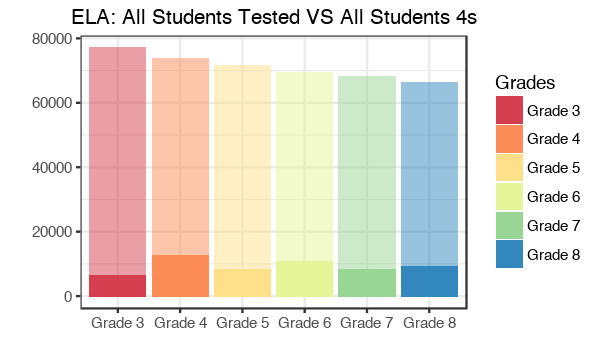

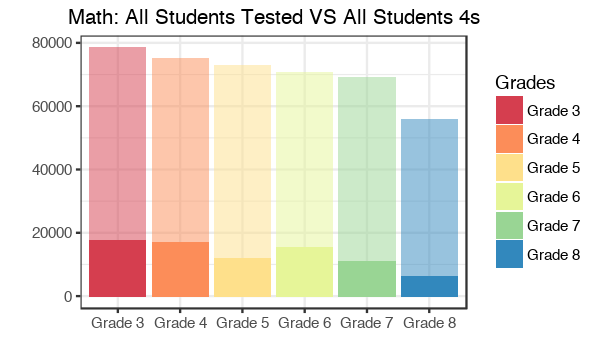

In [266]:
options(repr.plot.width=5,repr.plot.height=3)
add <- function() {
    list(scale_fill_brewer(name="Grades",palette='Spectral'),
         xlab(''), ylab(''),theme_bw(),
         theme(plot.title=element_text(size=12,hjust=0.5)))
}

ggplot(data=grades_ela, 
       aes(x=rownames(grades_ela),fill=rownames(grades_ela))) +
    geom_bar(aes(y=All.Students.Tested),stat="identity",alpha=0.5) +
    geom_bar(aes(y=All.Students.4s),stat="identity") +
    ggtitle('ELA: All Students Tested VS All Students 4s') + add()

ggplot(data=grades_math, 
       aes(x=rownames(grades_math),fill=rownames(grades_math))) +
    geom_bar(aes(y=All.Students.Tested),stat="identity",alpha=0.5) +
    geom_bar(aes(y=All.Students.4s),stat="identity") +
    ggtitle('Math: All Students Tested VS All Students 4s') + add()

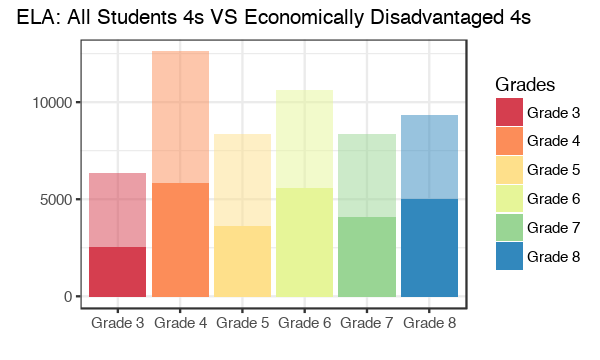

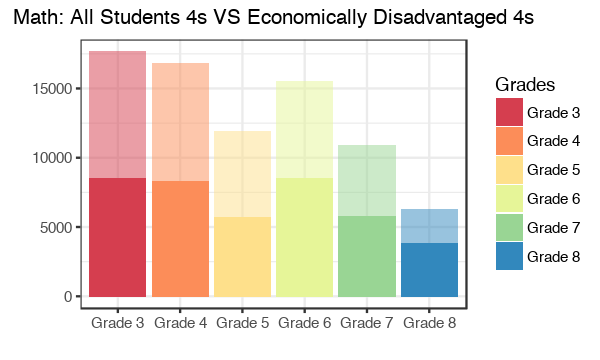

In [267]:
ggplot(data=grades_ela, 
       aes(x=rownames(grades_ela),fill=rownames(grades_ela))) + add() +
    geom_bar(aes(y=All.Students.4s),stat="identity",alpha=0.5) +
    geom_bar(aes(y=Economically.Disadvantaged.4s),stat="identity") +
    ggtitle('ELA: All Students 4s VS Economically Disadvantaged 4s')

ggplot(data=grades_math, 
       aes(x=rownames(grades_math),fill=rownames(grades_math))) + add() +
    geom_bar(aes(y=All.Students.4s),stat="identity",alpha=0.5) +
    geom_bar(aes(y=Economically.Disadvantaged.4s),stat="identity") +
    ggtitle('Math: All Students 4s VS Economically Disadvantaged 4s')

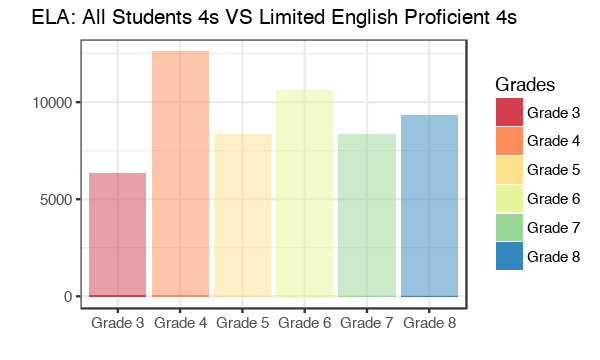

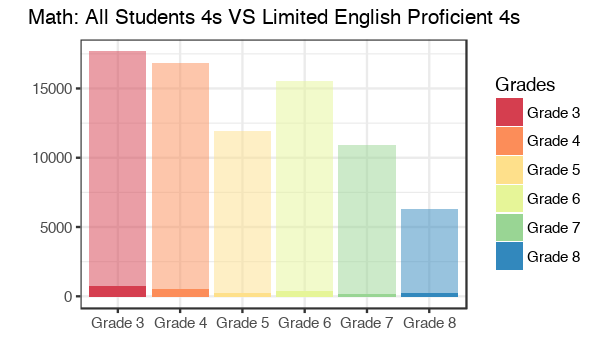

In [268]:
ggplot(data=grades_ela, 
       aes(x=rownames(grades_ela),fill=rownames(grades_ela))) +
    geom_bar(aes(y=All.Students.4s),stat="identity",alpha=0.5) +
    geom_bar(aes(y=Limited.English.Proficient.4s),stat="identity") +
    ggtitle('ELA: All Students 4s VS Limited English Proficient 4s') + add()

ggplot(data=grades_math, 
       aes(x=rownames(grades_math),fill=rownames(grades_math))) +
    geom_bar(aes(y=All.Students.4s),stat="identity",alpha=0.5) +
    geom_bar(aes(y=Limited.English.Proficient.4s),stat="identity") +
    ggtitle('Math: All Students 4s VS Limited English Proficient 4s') + add()

In [253]:
#plot_variable3 <- function(data,v1,v2,title) {
#    ggplot(data=data, 
#       aes(x=rownames(data),fill=rownames(data))) +
#    geom_bar(aes(y=data[v1]),stat='identity',alpha=0.5) +
#    geom_bar(aes(y=data[v2]),stat='identity') +
#    ggtitle(title) + add()
#}

#plot_variable3(grades_ela,'All.Students.4s','Economically.Disadvantaged.4s',
#               'ELA: All Students 4s VS Economically.Disadvantaged.4s')
#plot_variable3(grades_math,'All.Students.4s','Economically.Disadvantaged.4s',
#               'Math: All Students 4s VS Economically.Disadvantaged.4s')